In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 24px;
}

div.output_area pre {
    font-size: 24px;
}
</style>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import matplotlib.font_manager
from matplotlib.pyplot import figure
import matplotlib.patches as patches
figure(num=None, figsize=(8, 8), dpi=115)

sns.set_style('white')
sns.set_context('poster')

<Figure size 920x920 with 0 Axes>

In [3]:
import pandas as pd
import json
# Loading in HMC Data
def process_log(path_to_log):
    rows = []
    with open(path_to_log) as log_file:
        for line in log_file:
            #print(json.loads(line))
            entry = json.loads(line)
            rows.append(json.loads(line))
    return pd.DataFrame.from_dict(rows, orient='columns')

data = []; infer = []; prop = []
path = 'CompareLogs/HMC_Bounds_0_20_0_lower.log'
HMC_phi_0 = np.asarray(process_log(path)['Lower'])
for i in HMC_phi_0:
    data.append(float(i))
    infer.append("HMC")
    prop.append("0")
path = 'CompareLogs/HMC_Bounds_0_20_1_lower.log'
HMC_phi_1 = np.asarray(process_log(path)['Lower'])
for i in HMC_phi_1:
    data.append(float(i))
    infer.append("HMC")
    prop.append("1")
path = 'CompareLogs/HMC_Bounds_0_20_2_lower.log'
HMC_phi_2 = np.asarray(process_log(path)['Lower'])
for i in HMC_phi_2:
    data.append(float(i))
    infer.append("HMC")
    prop.append("2")
path = 'CompareLogs/HMC_Bounds_0_20_3_lower.log'
HMC_phi_3 = np.asarray(process_log(path)['Lower'])
for i in HMC_phi_3:
    data.append(float(i))
    infer.append("HMC")
    prop.append("3")
path = 'CompareLogs/HMC_Bounds_0_20_4_lower.log'
HMC_phi_4 = np.asarray(process_log(path)['Lower'])
for i in HMC_phi_4:
    data.append(float(i))
    infer.append("HMC")
    prop.append("4")
    

path = 'GridDecLogs/HCAS_Bounds_0_20_0_lower.log'
VI_phi_0 = np.asarray(process_log(path)['Lower'])
for i in VI_phi_0:
    data.append(float(i))
    infer.append("VI")
    prop.append("0")
path = 'GridDecLogs/HCAS_Bounds_0_20_1_lower.log'
VI_phi_1 = np.asarray(process_log(path)['Lower'])
for i in VI_phi_1:
    data.append(float(i))
    infer.append("VI")
    prop.append("1")
path = 'GridDecLogs/HCAS_Bounds_0_20_2_lower.log'
VI_phi_2 = np.asarray(process_log(path)['Lower'])
for i in VI_phi_2:
    data.append(float(i))
    infer.append("VI")
    prop.append("2")
path = 'GridDecLogs/HCAS_Bounds_3_20_3_lower.log'
VI_phi_3 = np.asarray(process_log(path)['Lower'])
for i in VI_phi_3:
    data.append(float(i))
    infer.append("VI")
    prop.append("3")
path = 'GridDecLogs/HCAS_Bounds_0_20_4_lower.log'
VI_phi_4 = np.asarray(process_log(path)['Lower'])
for i in VI_phi_4:
    data.append(float(i))
    infer.append("VI")
    prop.append("4")
    

In [4]:
np.asarray(data)

array([2.30174180e-07, 1.98054931e-05, 1.60750584e-03, ...,
       1.95924353e-01, 2.10369773e-01, 2.08581022e-01])

In [5]:
df = pd.DataFrame(np.c_[data,infer,prop],columns = ["Bound","Inference","Property"])

In [6]:
df.head()
df["Bound"] = pd.to_numeric(df["Bound"])
df.dtypes

Bound        float64
Inference     object
Property      object
dtype: object

Text(0.5, 0, 'Property $\\phi$')

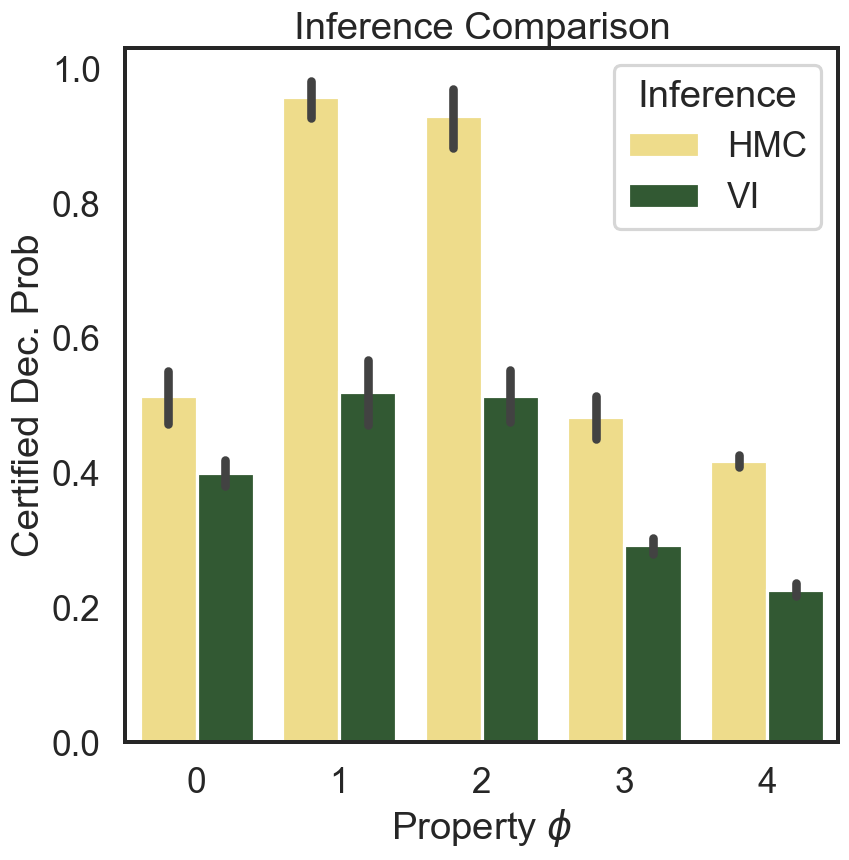

In [15]:

plt.figure(num=None, figsize=(8, 8), dpi=115)
sns.set_style('white')
sns.set_context('poster')
p = sns.color_palette("coolwarm", 10)
pal = ["#FFE77AFF", "#2C5F2DFF"]


sns.barplot(x='Property', y='Bound', hue='Inference', 
            data=df, palette=pal)

plt.title('Inference Comparison')
plt.ylabel('Certified Dec. Prob')
plt.xlabel(r'Property $\phi$')